In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
medical_df = pd.read_csv("train.csv")

In [ ]:
medical_df

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30
0,17319,NaN,2017-12-13 00:00:00,2017-12-20 00:00:00,62,1,2,M25551,S72001A,0SRR01Z,...,Z803,NaN,Z86711,NaN,Z86718,NaN,Z85828,NaN,469,0
1,19722,NaN,2017-10-19 00:00:00,2017-10-23 00:00:00,1,1,1,R531,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,1
2,89699,NaN,2018-08-06 00:00:00,2018-08-08 00:00:00,1,1,1,R002,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0
3,8086,NaN,2016-12-20 00:00:00,2016-12-27 00:00:00,62,5,1,K661,K661,NaN,...,I440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393,0
4,68049,NaN,2016-01-06 00:00:00,2016-01-12 00:00:00,6,1,1,J9601,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,119880,NaN,2018-12-18 00:00:00,2018-12-19 00:00:00,1,3,2,R079,T82855A,027035Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,0
130292,103695,NaN,2019-11-23 00:00:00,2019-11-27 00:00:00,6,1,1,R531,I130,3E02340,...,Z79899,NaN,Z23,NaN,I2781,NaN,NaN,NaN,291,1
130293,131933,NaN,2020-12-10 00:00:00,2020-12-17 00:00:00,6,1,1,R197,A419,0DBN8ZX,...,Z9049,NaN,Z90710,NaN,NaN,NaN,NaN,NaN,871,0
130294,146868,NaN,2022-10-10 00:00:00,2022-10-19 00:00:00,3,1,1,R4182,A4159,0BH17EZ,...,R7401,NaN,F209,NaN,I071,NaN,Z9981,NaN,871,0


In [ ]:
medical_df.shape

(130296, 60)

In [ ]:
len(medical_df["ID"].unique())

130296

In [ ]:
medical_df.drop(columns=["ID"], inplace=True)

In [ ]:
medical_df.isnull().sum()

,0
STAY_DRG_CD,126498
STAY_FROM_DT,0
STAY_THRU_DT,0
STUS_CD,0
TYPE_ADM,0
SRC_ADMS,0
AD_DGNS,0
DGNSCD01,0
PRCDRCD01,68668
DGNSCD02,143


<Figure size 1200x600 with 0 Axes>

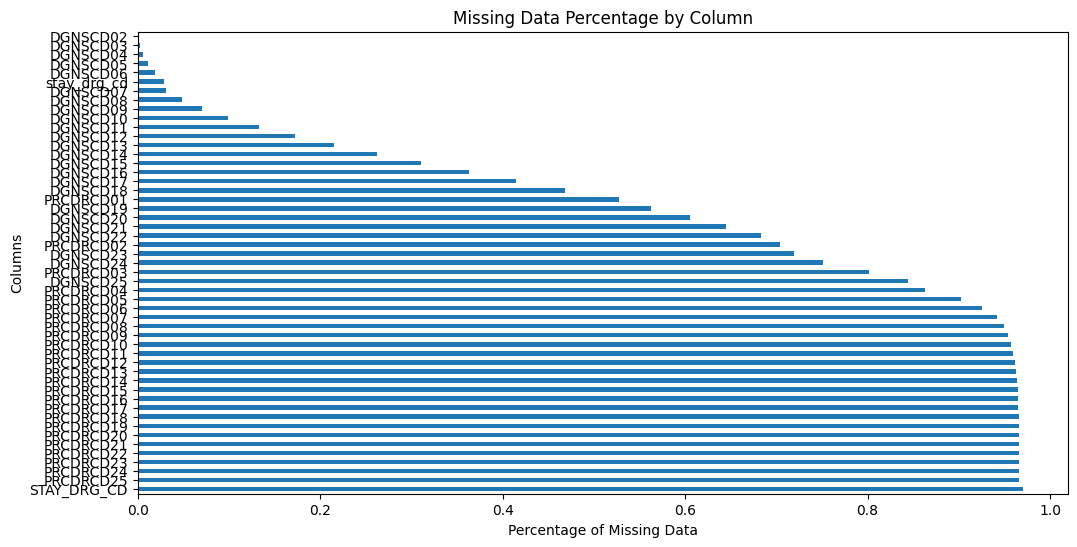

In [3]:

missing_percentage=medical_df.isna().sum() / medical_df.shape[0]
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='barh')
plt.title('Missing Data Percentage by Column')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Columns')
plt.show()

In [6]:
dgn_columns = medical_df.columns[medical_df.columns.str.startswith('DGN')]
dgn_df = medical_df[dgn_columns]

In [7]:
dgn_df.columns

Index(['DGNSCD01', 'DGNSCD02', 'DGNSCD03', 'DGNSCD04', 'DGNSCD05', 'DGNSCD06',
       'DGNSCD07', 'DGNSCD08', 'DGNSCD09', 'DGNSCD10', 'DGNSCD11', 'DGNSCD12',
       'DGNSCD13', 'DGNSCD14', 'DGNSCD15', 'DGNSCD16', 'DGNSCD17', 'DGNSCD18',
       'DGNSCD19', 'DGNSCD20', 'DGNSCD21', 'DGNSCD22', 'DGNSCD23', 'DGNSCD24',
       'DGNSCD25'],
      dtype='object')

# **Handling Missing Values**

In [8]:
null_rows = medical_df[medical_df['DGNSCD02'].isnull()]

In [9]:
dgn_df.iloc[null_rows.index]

,DGNSCD01,DGNSCD02,DGNSCD03,DGNSCD04,DGNSCD05,DGNSCD06,DGNSCD07,DGNSCD08,DGNSCD09,DGNSCD10,...,DGNSCD16,DGNSCD17,DGNSCD18,DGNSCD19,DGNSCD20,DGNSCD21,DGNSCD22,DGNSCD23,DGNSCD24,DGNSCD25
496,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,M1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,M1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3610,M1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4552,M1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124932,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125825,N390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128875,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129815,S82841C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
null_rows.shape

(143, 60)

In [11]:
dgn_df.iloc[null_rows.index]

,DGNSCD01,DGNSCD02,DGNSCD03,DGNSCD04,DGNSCD05,DGNSCD06,DGNSCD07,DGNSCD08,DGNSCD09,DGNSCD10,...,DGNSCD16,DGNSCD17,DGNSCD18,DGNSCD19,DGNSCD20,DGNSCD21,DGNSCD22,DGNSCD23,DGNSCD24,DGNSCD25
496,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,M1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,M1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3610,M1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4552,M1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124932,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125825,N390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128875,M1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129815,S82841C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dgn_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 496 to 130226
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DGNSCD01  143 non-null    object
 1   DGNSCD02  0 non-null      object
 2   DGNSCD03  0 non-null      object
 3   DGNSCD04  0 non-null      object
 4   DGNSCD05  0 non-null      object
 5   DGNSCD06  0 non-null      object
 6   DGNSCD07  0 non-null      object
 7   DGNSCD08  0 non-null      object
 8   DGNSCD09  0 non-null      object
 9   DGNSCD10  0 non-null      object
 10  DGNSCD11  0 non-null      object
 11  DGNSCD12  0 non-null      object
 12  DGNSCD13  0 non-null      object
 13  DGNSCD14  0 non-null      object
 14  DGNSCD15  0 non-null      object
 15  DGNSCD16  0 non-null      object
 16  DGNSCD17  0 non-null      object
 17  DGNSCD18  0 non-null      object
 18  DGNSCD19  0 non-null      object
 19  DGNSCD20  0 non-null      object
 20  DGNSCD21  0 non-null      object
 21  DGNSCD22  0 non-

In [13]:
null_rows = medical_df[medical_df['DGNSCD03'].isnull()]
dgn_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 223 to 130226
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DGNSCD01  359 non-null    object
 1   DGNSCD02  216 non-null    object
 2   DGNSCD03  0 non-null      object
 3   DGNSCD04  0 non-null      object
 4   DGNSCD05  0 non-null      object
 5   DGNSCD06  0 non-null      object
 6   DGNSCD07  0 non-null      object
 7   DGNSCD08  0 non-null      object
 8   DGNSCD09  0 non-null      object
 9   DGNSCD10  0 non-null      object
 10  DGNSCD11  0 non-null      object
 11  DGNSCD12  0 non-null      object
 12  DGNSCD13  0 non-null      object
 13  DGNSCD14  0 non-null      object
 14  DGNSCD15  0 non-null      object
 15  DGNSCD16  0 non-null      object
 16  DGNSCD17  0 non-null      object
 17  DGNSCD18  0 non-null      object
 18  DGNSCD19  0 non-null      object
 19  DGNSCD20  0 non-null      object
 20  DGNSCD21  0 non-null      object
 21  DGNSCD22  0 non-

In [14]:
null_rows = medical_df[medical_df['DGNSCD04'].isnull()]
dgn_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 185 to 130226
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DGNSCD01  764 non-null    object
 1   DGNSCD02  621 non-null    object
 2   DGNSCD03  405 non-null    object
 3   DGNSCD04  0 non-null      object
 4   DGNSCD05  0 non-null      object
 5   DGNSCD06  0 non-null      object
 6   DGNSCD07  0 non-null      object
 7   DGNSCD08  0 non-null      object
 8   DGNSCD09  0 non-null      object
 9   DGNSCD10  0 non-null      object
 10  DGNSCD11  0 non-null      object
 11  DGNSCD12  0 non-null      object
 12  DGNSCD13  0 non-null      object
 13  DGNSCD14  0 non-null      object
 14  DGNSCD15  0 non-null      object
 15  DGNSCD16  0 non-null      object
 16  DGNSCD17  0 non-null      object
 17  DGNSCD18  0 non-null      object
 18  DGNSCD19  0 non-null      object
 19  DGNSCD20  0 non-null      object
 20  DGNSCD21  0 non-null      object
 21  DGNSCD22  0 non-

In [15]:
null_rows = medical_df[medical_df['DGNSCD05'].isnull()]
dgn_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 182 to 130255
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DGNSCD01  1407 non-null   object
 1   DGNSCD02  1264 non-null   object
 2   DGNSCD03  1048 non-null   object
 3   DGNSCD04  643 non-null    object
 4   DGNSCD05  0 non-null      object
 5   DGNSCD06  0 non-null      object
 6   DGNSCD07  0 non-null      object
 7   DGNSCD08  0 non-null      object
 8   DGNSCD09  0 non-null      object
 9   DGNSCD10  0 non-null      object
 10  DGNSCD11  0 non-null      object
 11  DGNSCD12  0 non-null      object
 12  DGNSCD13  0 non-null      object
 13  DGNSCD14  0 non-null      object
 14  DGNSCD15  0 non-null      object
 15  DGNSCD16  0 non-null      object
 16  DGNSCD17  0 non-null      object
 17  DGNSCD18  0 non-null      object
 18  DGNSCD19  0 non-null      object
 19  DGNSCD20  0 non-null      object
 20  DGNSCD21  0 non-null      object
 21  DGNSCD22  0 non

In [16]:
null_rows = medical_df[medical_df['DGNSCD06'].isnull()]
dgn_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2469 entries, 93 to 130255
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DGNSCD01  2469 non-null   object
 1   DGNSCD02  2326 non-null   object
 2   DGNSCD03  2110 non-null   object
 3   DGNSCD04  1705 non-null   object
 4   DGNSCD05  1062 non-null   object
 5   DGNSCD06  0 non-null      object
 6   DGNSCD07  0 non-null      object
 7   DGNSCD08  0 non-null      object
 8   DGNSCD09  0 non-null      object
 9   DGNSCD10  0 non-null      object
 10  DGNSCD11  0 non-null      object
 11  DGNSCD12  0 non-null      object
 12  DGNSCD13  0 non-null      object
 13  DGNSCD14  0 non-null      object
 14  DGNSCD15  0 non-null      object
 15  DGNSCD16  0 non-null      object
 16  DGNSCD17  0 non-null      object
 17  DGNSCD18  0 non-null      object
 18  DGNSCD19  0 non-null      object
 19  DGNSCD20  0 non-null      object
 20  DGNSCD21  0 non-null      object
 21  DGNSCD22  0 non-

In [17]:
medical_df[dgn_df.columns] = medical_df[dgn_df.columns].fillna(0)

In [18]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 60 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             130296 non-null  int64  
 1   STAY_DRG_CD    3798 non-null    float64
 2   STAY_FROM_DT   130296 non-null  object 
 3   STAY_THRU_DT   130296 non-null  object 
 4   STUS_CD        130296 non-null  int64  
 5   TYPE_ADM       130296 non-null  int64  
 6   SRC_ADMS       130296 non-null  int64  
 7   AD_DGNS        130296 non-null  object 
 8   DGNSCD01       130296 non-null  object 
 9   PRCDRCD01      61628 non-null   object 
 10  DGNSCD02       130296 non-null  object 
 11  PRCDRCD02      38509 non-null   object 
 12  DGNSCD03       130296 non-null  object 
 13  PRCDRCD03      25879 non-null   object 
 14  DGNSCD04       130296 non-null  object 
 15  PRCDRCD04      17840 non-null   object 
 16  DGNSCD05       130296 non-null  object 
 17  PRCDRCD05      12711 non-null

# **Extracting Procedure Codes**

In [19]:
prc_columns = medical_df.columns[medical_df.columns.str.startswith('PRC')]
prc_df = medical_df[prc_columns]

In [ ]:
prc_df

,PRCDRCD01,PRCDRCD02,PRCDRCD03,PRCDRCD04,PRCDRCD05,PRCDRCD06,PRCDRCD07,PRCDRCD08,PRCDRCD09,PRCDRCD10,...,PRCDRCD16,PRCDRCD17,PRCDRCD18,PRCDRCD19,PRCDRCD20,PRCDRCD21,PRCDRCD22,PRCDRCD23,PRCDRCD24,PRCDRCD25
0,0SRR01Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,027035Z,4A023N7,B2111ZZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130292,3E02340,3E0234Z,5A09357,5A09357,5A09357,5A09357,5A09357,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130293,0DBN8ZX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130294,0BH17EZ,5A1945Z,02HV33Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
null_rows = medical_df[medical_df['PRCDRCD01'].isnull()]
prc_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 68668 entries, 1 to 130295
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRCDRCD01  0 non-null      object
 1   PRCDRCD02  0 non-null      object
 2   PRCDRCD03  0 non-null      object
 3   PRCDRCD04  0 non-null      object
 4   PRCDRCD05  0 non-null      object
 5   PRCDRCD06  0 non-null      object
 6   PRCDRCD07  0 non-null      object
 7   PRCDRCD08  0 non-null      object
 8   PRCDRCD09  0 non-null      object
 9   PRCDRCD10  0 non-null      object
 10  PRCDRCD11  0 non-null      object
 11  PRCDRCD12  0 non-null      object
 12  PRCDRCD13  0 non-null      object
 13  PRCDRCD14  0 non-null      object
 14  PRCDRCD15  0 non-null      object
 15  PRCDRCD16  0 non-null      object
 16  PRCDRCD17  0 non-null      object
 17  PRCDRCD18  0 non-null      object
 18  PRCDRCD19  0 non-null      object
 19  PRCDRCD20  0 non-null      object
 20  PRCDRCD21  0 non-null      objec

In [21]:
null_rows = medical_df[medical_df['PRCDRCD02'].isnull()]
prc_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 91787 entries, 0 to 130295
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRCDRCD01  23119 non-null  object
 1   PRCDRCD02  0 non-null      object
 2   PRCDRCD03  0 non-null      object
 3   PRCDRCD04  0 non-null      object
 4   PRCDRCD05  0 non-null      object
 5   PRCDRCD06  0 non-null      object
 6   PRCDRCD07  0 non-null      object
 7   PRCDRCD08  0 non-null      object
 8   PRCDRCD09  0 non-null      object
 9   PRCDRCD10  0 non-null      object
 10  PRCDRCD11  0 non-null      object
 11  PRCDRCD12  0 non-null      object
 12  PRCDRCD13  0 non-null      object
 13  PRCDRCD14  0 non-null      object
 14  PRCDRCD15  0 non-null      object
 15  PRCDRCD16  0 non-null      object
 16  PRCDRCD17  0 non-null      object
 17  PRCDRCD18  0 non-null      object
 18  PRCDRCD19  0 non-null      object
 19  PRCDRCD20  0 non-null      object
 20  PRCDRCD21  0 non-null      objec

In [22]:
null_rows = medical_df[medical_df['PRCDRCD03'].isnull()]
prc_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 104417 entries, 0 to 130295
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRCDRCD01  35749 non-null  object
 1   PRCDRCD02  12630 non-null  object
 2   PRCDRCD03  0 non-null      object
 3   PRCDRCD04  0 non-null      object
 4   PRCDRCD05  0 non-null      object
 5   PRCDRCD06  0 non-null      object
 6   PRCDRCD07  0 non-null      object
 7   PRCDRCD08  0 non-null      object
 8   PRCDRCD09  0 non-null      object
 9   PRCDRCD10  0 non-null      object
 10  PRCDRCD11  0 non-null      object
 11  PRCDRCD12  0 non-null      object
 12  PRCDRCD13  0 non-null      object
 13  PRCDRCD14  0 non-null      object
 14  PRCDRCD15  0 non-null      object
 15  PRCDRCD16  0 non-null      object
 16  PRCDRCD17  0 non-null      object
 17  PRCDRCD18  0 non-null      object
 18  PRCDRCD19  0 non-null      object
 19  PRCDRCD20  0 non-null      object
 20  PRCDRCD21  0 non-null      obje

In [23]:
null_rows = medical_df[medical_df['PRCDRCD04'].isnull()]
prc_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 112456 entries, 0 to 130295
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRCDRCD01  43788 non-null  object
 1   PRCDRCD02  20669 non-null  object
 2   PRCDRCD03  8039 non-null   object
 3   PRCDRCD04  0 non-null      object
 4   PRCDRCD05  0 non-null      object
 5   PRCDRCD06  0 non-null      object
 6   PRCDRCD07  0 non-null      object
 7   PRCDRCD08  0 non-null      object
 8   PRCDRCD09  0 non-null      object
 9   PRCDRCD10  0 non-null      object
 10  PRCDRCD11  0 non-null      object
 11  PRCDRCD12  0 non-null      object
 12  PRCDRCD13  0 non-null      object
 13  PRCDRCD14  0 non-null      object
 14  PRCDRCD15  0 non-null      object
 15  PRCDRCD16  0 non-null      object
 16  PRCDRCD17  0 non-null      object
 17  PRCDRCD18  0 non-null      object
 18  PRCDRCD19  0 non-null      object
 19  PRCDRCD20  0 non-null      object
 20  PRCDRCD21  0 non-null      obje

In [24]:
null_rows = medical_df[medical_df['PRCDRCD05'].isnull()]
prc_df.iloc[null_rows.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 117585 entries, 0 to 130295
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRCDRCD01  48917 non-null  object
 1   PRCDRCD02  25798 non-null  object
 2   PRCDRCD03  13168 non-null  object
 3   PRCDRCD04  5129 non-null   object
 4   PRCDRCD05  0 non-null      object
 5   PRCDRCD06  0 non-null      object
 6   PRCDRCD07  0 non-null      object
 7   PRCDRCD08  0 non-null      object
 8   PRCDRCD09  0 non-null      object
 9   PRCDRCD10  0 non-null      object
 10  PRCDRCD11  0 non-null      object
 11  PRCDRCD12  0 non-null      object
 12  PRCDRCD13  0 non-null      object
 13  PRCDRCD14  0 non-null      object
 14  PRCDRCD15  0 non-null      object
 15  PRCDRCD16  0 non-null      object
 16  PRCDRCD17  0 non-null      object
 17  PRCDRCD18  0 non-null      object
 18  PRCDRCD19  0 non-null      object
 19  PRCDRCD20  0 non-null      object
 20  PRCDRCD21  0 non-null      obje

In [25]:
medical_df[prc_df.columns] = medical_df[prc_df.columns].fillna(0)

In [26]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 60 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             130296 non-null  int64  
 1   STAY_DRG_CD    3798 non-null    float64
 2   STAY_FROM_DT   130296 non-null  object 
 3   STAY_THRU_DT   130296 non-null  object 
 4   STUS_CD        130296 non-null  int64  
 5   TYPE_ADM       130296 non-null  int64  
 6   SRC_ADMS       130296 non-null  int64  
 7   AD_DGNS        130296 non-null  object 
 8   DGNSCD01       130296 non-null  object 
 9   PRCDRCD01      130296 non-null  object 
 10  DGNSCD02       130296 non-null  object 
 11  PRCDRCD02      130296 non-null  object 
 12  DGNSCD03       130296 non-null  object 
 13  PRCDRCD03      130296 non-null  object 
 14  DGNSCD04       130296 non-null  object 
 15  PRCDRCD04      130296 non-null  object 
 16  DGNSCD05       130296 non-null  object 
 17  PRCDRCD05      130296 non-nul

In [27]:
medical_df = medical_df.replace('-', 0)
medical_df = medical_df.apply(pd.to_numeric, errors='ignore')

<ipython-input-27-9e5ec2f79bea>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  medical_df = medical_df.apply(pd.to_numeric, errors='ignore')


In [28]:
medical_df.isnull().sum()

,0
ID,0
STAY_DRG_CD,126498
STAY_FROM_DT,0
STAY_THRU_DT,0
STUS_CD,0
TYPE_ADM,0
SRC_ADMS,0
AD_DGNS,0
DGNSCD01,0
PRCDRCD01,0


# **Feature Engineering**

In [ ]:
def calculate_diagnosis(row):
    count = 0
    for column in row.index:
        if row[column] == 0:
            continue
        count += 1
    return count

medical_df["Number of Diagnosis"] = medical_df[dgn_columns].apply(calculate_diagnosis, axis=1)

In [ ]:
def calculate_procedures(row):
    count = 0
    for column in row.index:
        if row[column] == 0:
            continue
        count += 1
    return count

medical_df["Number of Procedures"] = medical_df[prc_columns].apply(calculate_procedures, axis=1)

In [ ]:
medical_df

,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures
0,NaN,2017-12-13 00:00:00,2017-12-20 00:00:00,62,1,2,M25551,S72001A,0SRR01Z,G9340,...,Z86711,0,Z86718,0,Z85828,0,469.0,0,25,1
1,NaN,2017-10-19 00:00:00,2017-10-23 00:00:00,1,1,1,R531,A419,0,G9341,...,0,0,0,0,0,0,871.0,1,15,0
2,NaN,2018-08-06 00:00:00,2018-08-08 00:00:00,1,1,1,R002,J690,0,I5031,...,0,0,0,0,0,0,177.0,0,21,0
3,NaN,2016-12-20 00:00:00,2016-12-27 00:00:00,62,5,1,K661,K661,0,R6511,...,0,0,0,0,0,0,393.0,0,22,0
4,NaN,2016-01-06 00:00:00,2016-01-12 00:00:00,6,1,1,J9601,J690,0,J9601,...,0,0,0,0,0,0,177.0,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,NaN,2018-12-18 00:00:00,2018-12-19 00:00:00,1,3,2,R079,T82855A,027035Z,E7800,...,0,0,0,0,0,0,247.0,0,7,3
130292,NaN,2019-11-23 00:00:00,2019-11-27 00:00:00,6,1,1,R531,I130,3E02340,J9602,...,Z23,0,I2781,0,0,0,291.0,1,24,7
130293,NaN,2020-12-10 00:00:00,2020-12-17 00:00:00,6,1,1,R197,A419,0DBN8ZX,I21A1,...,Z90710,0,0,0,0,0,871.0,0,23,1
130294,NaN,2022-10-10 00:00:00,2022-10-19 00:00:00,3,1,1,R4182,A4159,0BH17EZ,G9341,...,F209,0,I071,0,Z9981,0,871.0,0,25,3


In [ ]:
medical_df["STAY_FROM_DT"] = pd.to_datetime(medical_df["STAY_FROM_DT"])

In [ ]:
medical_df["STAY_THRU_DT"] = pd.to_datetime(medical_df["STAY_THRU_DT"])

In [ ]:
medical_df["Days Admitted"] = (medical_df["STAY_THRU_DT"] - medical_df["STAY_FROM_DT"]).dt.days

In [ ]:
medical_df

,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted
0,NaN,2017-12-13,2017-12-20,62,1,2,M25551,S72001A,0SRR01Z,G9340,...,0,Z86718,0,Z85828,0,469.0,0,25,1,7
1,NaN,2017-10-19,2017-10-23,1,1,1,R531,A419,0,G9341,...,0,0,0,0,0,871.0,1,15,0,4
2,NaN,2018-08-06,2018-08-08,1,1,1,R002,J690,0,I5031,...,0,0,0,0,0,177.0,0,21,0,2
3,NaN,2016-12-20,2016-12-27,62,5,1,K661,K661,0,R6511,...,0,0,0,0,0,393.0,0,22,0,7
4,NaN,2016-01-06,2016-01-12,6,1,1,J9601,J690,0,J9601,...,0,0,0,0,0,177.0,0,13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,NaN,2018-12-18,2018-12-19,1,3,2,R079,T82855A,027035Z,E7800,...,0,0,0,0,0,247.0,0,7,3,1
130292,NaN,2019-11-23,2019-11-27,6,1,1,R531,I130,3E02340,J9602,...,0,I2781,0,0,0,291.0,1,24,7,4
130293,NaN,2020-12-10,2020-12-17,6,1,1,R197,A419,0DBN8ZX,I21A1,...,0,0,0,0,0,871.0,0,23,1,7
130294,NaN,2022-10-10,2022-10-19,3,1,1,R4182,A4159,0BH17EZ,G9341,...,0,I071,0,Z9981,0,871.0,0,25,3,9


In [ ]:
medical_df.drop(columns=["STAY_THRU_DT", "STAY_FROM_DT"], inplace=True)

In [ ]:
medical_df

,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted
0,NaN,62,1,2,M25551,S72001A,0SRR01Z,G9340,0,J9600,...,0,Z86718,0,Z85828,0,469.0,0,25,1,7
1,NaN,1,1,1,R531,A419,0,G9341,0,N390,...,0,0,0,0,0,871.0,1,15,0,4
2,NaN,1,1,1,R002,J690,0,I5031,0,I130,...,0,0,0,0,0,177.0,0,21,0,2
3,NaN,62,5,1,K661,K661,0,R6511,0,D62,...,0,0,0,0,0,393.0,0,22,0,7
4,NaN,6,1,1,J9601,J690,0,J9601,0,N179,...,0,0,0,0,0,177.0,0,13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,NaN,1,3,2,R079,T82855A,027035Z,E7800,4A023N7,I2510,...,0,0,0,0,0,247.0,0,7,3,1
130292,NaN,6,1,1,R531,I130,3E02340,J9602,3E0234Z,E870,...,0,I2781,0,0,0,291.0,1,24,7,4
130293,NaN,6,1,1,R197,A419,0DBN8ZX,I21A1,0,A09,...,0,0,0,0,0,871.0,0,23,1,7
130294,NaN,3,1,1,R4182,A4159,0BH17EZ,G9341,5A1945Z,J9601,...,0,I071,0,Z9981,0,871.0,0,25,3,9


In [ ]:
medical_df[(medical_df["STAY_DRG_CD"].isnull()) & (medical_df["stay_drg_cd"].isnull())]

,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted


In [ ]:
medical_df[medical_df["stay_drg_cd"].isnull()]

,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted
11,314.0,6,1,1,I959,I9589,0,N170,0,D6859,...,0,0,0,0,0,NaN,1,20,0,2
44,682.0,6,1,1,R531,N170,0,E1100,0,K8590,...,0,0,0,0,0,NaN,0,18,0,2
65,689.0,3,1,1,E876,N390,0,G9341,0,J449,...,0,0,0,0,0,NaN,0,13,0,3
87,689.0,3,1,1,N390,N390,05H533Z,G9341,0,F0390,...,0,0,0,0,0,NaN,1,9,1,3
151,291.0,1,1,1,R0602,I130,0,I5023,0,N184,...,0,0,0,0,0,NaN,0,15,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130214,682.0,3,1,2,R05,N179,0,I21A1,0,J9811,...,0,0,0,0,0,NaN,1,20,0,3
130228,682.0,3,1,1,R0602,N179,0,J189,0,I130,...,0,0,0,0,0,NaN,0,17,0,4
130254,291.0,6,1,1,R0602,I110,0,J9620,0,I5043,...,0,0,0,0,0,NaN,1,20,0,2
130267,291.0,1,1,1,R0602,I130,0,J9690,0,I5043,...,0,Z8249,0,Z833,0,NaN,1,25,0,5


In [ ]:
medical_df[medical_df["STAY_DRG_CD"].isnull()]

,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted
0,NaN,62,1,2,M25551,S72001A,0SRR01Z,G9340,0,J9600,...,0,Z86718,0,Z85828,0,469.0,0,25,1,7
1,NaN,1,1,1,R531,A419,0,G9341,0,N390,...,0,0,0,0,0,871.0,1,15,0,4
2,NaN,1,1,1,R002,J690,0,I5031,0,I130,...,0,0,0,0,0,177.0,0,21,0,2
3,NaN,62,5,1,K661,K661,0,R6511,0,D62,...,0,0,0,0,0,393.0,0,22,0,7
4,NaN,6,1,1,J9601,J690,0,J9601,0,N179,...,0,0,0,0,0,177.0,0,13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,NaN,1,3,2,R079,T82855A,027035Z,E7800,4A023N7,I2510,...,0,0,0,0,0,247.0,0,7,3,1
130292,NaN,6,1,1,R531,I130,3E02340,J9602,3E0234Z,E870,...,0,I2781,0,0,0,291.0,1,24,7,4
130293,NaN,6,1,1,R197,A419,0DBN8ZX,I21A1,0,A09,...,0,0,0,0,0,871.0,0,23,1,7
130294,NaN,3,1,1,R4182,A4159,0BH17EZ,G9341,5A1945Z,J9601,...,0,I071,0,Z9981,0,871.0,0,25,3,9


In [ ]:
def get_stay_drg(row):
    if pd.isnull(row["STAY_DRG_CD"]):
        return row["stay_drg_cd"]
    return row["STAY_DRG_CD"]
medical_df["STAY_DRG"] = medical_df[["STAY_DRG_CD", "stay_drg_cd"]].apply(get_stay_drg, axis=1)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 61 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   STAY_DRG_CD           3798 non-null    float64
 1   STUS_CD               130296 non-null  int64  
 2   TYPE_ADM              130296 non-null  int64  
 3   SRC_ADMS              130296 non-null  int64  
 4   AD_DGNS               130296 non-null  object 
 5   DGNSCD01              130296 non-null  object 
 6   PRCDRCD01             130296 non-null  object 
 7   DGNSCD02              130296 non-null  object 
 8   PRCDRCD02             130296 non-null  object 
 9   DGNSCD03              130296 non-null  object 
 10  PRCDRCD03             130296 non-null  object 
 11  DGNSCD04              130296 non-null  object 
 12  PRCDRCD04             130296 non-null  object 
 13  DGNSCD05              130296 non-null  object 
 14  PRCDRCD05             130296 non-null  object 
 15  

In [ ]:
medical_df.drop(columns=["STAY_DRG_CD", "stay_drg_cd"], inplace=True)

In [ ]:
medical_df.isnull().sum()

,0
STUS_CD,0
TYPE_ADM,0
SRC_ADMS,0
AD_DGNS,0
DGNSCD01,0
PRCDRCD01,0
DGNSCD02,0
PRCDRCD02,0
DGNSCD03,0
PRCDRCD03,0


In [ ]:
medical_df.shape

(130296, 59)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   STUS_CD               130296 non-null  int64  
 1   TYPE_ADM              130296 non-null  int64  
 2   SRC_ADMS              130296 non-null  int64  
 3   AD_DGNS               130296 non-null  object 
 4   DGNSCD01              130296 non-null  object 
 5   PRCDRCD01             130296 non-null  object 
 6   DGNSCD02              130296 non-null  object 
 7   PRCDRCD02             130296 non-null  object 
 8   DGNSCD03              130296 non-null  object 
 9   PRCDRCD03             130296 non-null  object 
 10  DGNSCD04              130296 non-null  object 
 11  PRCDRCD04             130296 non-null  object 
 12  DGNSCD05              130296 non-null  object 
 13  PRCDRCD05             130296 non-null  object 
 14  DGNSCD06              130296 non-null  object 
 15  

In [ ]:
medical_df[medical_df.eq("-").any(axis=1)]

,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,PRCDRCD03,...,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted,STAY_DRG


In [ ]:
medical_df = medical_df[~medical_df.eq("-").any(axis=1)]

In [ ]:
medical_df["STAY_DRG"] = medical_df["STAY_DRG"].astype(int)

In [ ]:
medical_df['Long_Stay'] = (medical_df['Days Admitted'] > 7).astype(int)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   STUS_CD               130296 non-null  int64 
 1   TYPE_ADM              130296 non-null  int64 
 2   SRC_ADMS              130296 non-null  int64 
 3   AD_DGNS               130296 non-null  object
 4   DGNSCD01              130296 non-null  object
 5   PRCDRCD01             130296 non-null  object
 6   DGNSCD02              130296 non-null  object
 7   PRCDRCD02             130296 non-null  object
 8   DGNSCD03              130296 non-null  object
 9   PRCDRCD03             130296 non-null  object
 10  DGNSCD04              130296 non-null  object
 11  PRCDRCD04             130296 non-null  object
 12  DGNSCD05              130296 non-null  object
 13  PRCDRCD05             130296 non-null  object
 14  DGNSCD06              130296 non-null  object
 15  PRCDRCD06        

In [ ]:
medical_df = pd.get_dummies(medical_df, columns=['TYPE_ADM', 'SRC_ADMS', 'STUS_CD'], drop_first=True)

In [ ]:
medical_df.shape

(130296, 67)

In [ ]:
medical_df["STAY_DRG"].unique()

array([469, 871, 177, 393, 292, 193,  64, 690, 314, 377, 378, 242, 870,
       202, 309, 683, 470, 291, 682, 246, 329, 280,   0, 190,  57, 330,
        65, 689, 388, 191, 196, 939, 872, 391, 247, 641, 808, 308, 101,
       100,  73, 602, 698, 684, 189, 813, 579, 603, 179, 178,  66, 438,
       194, 287, 482, 243,  70, 269, 379, 253, 592, 536, 473, 533, 637,
       244, 313, 175, 481, 982, 918, 281, 483, 901, 293, 192,  56, 310,
       466, 443, 205, 304, 556, 811, 640, 233, 948, 472, 561, 102, 885,
       442, 305, 372, 853, 699, 981, 195, 480, 311, 264, 540, 392, 389,
       249, 643, 286, 919, 226, 460, 902, 207, 621, 282, 493,  61, 695,
       453, 234, 444, 252,  71, 673, 545, 236, 638, 274, 335, 395, 560,
       371, 492, 552, 206, 802,  69, 920, 294, 303, 809, 554,  91, 176,
        25, 713, 474, 674, 439, 562, 433, 445, 390, 441, 219, 235, 203,
       455, 884, 271, 559, 368, 670, 394, 812, 520,  92, 208, 312, 659,
       498, 380, 331, 475, 691,  74, 563, 266, 464, 222, 988, 45

**Mapping DRG Codes to Categories**

In [ ]:
def create_drg_category_mapping():
    drg_map = {
        'PRE': (1, 19),
        'NERVOUS': (20, 103),
        'EYE': (113, 125),
        'ENT': (135, 159),
        'RESPIRATORY': (163, 208),
        'CIRCULATORY': (212, 320),
        'DIGESTIVE': (321, 399),
        'HEPATOBILIARY': (402, 446),
        'MUSCULOSKELETAL': (447, 566),
        'SKIN': (570, 607),
        'ENDOCRINE': (614, 645),
        'RENAL': (650, 700),
        'MALE_REPRO': (707, 730),
        'FEMALE_REPRO': (734, 761),
        'PREGNANCY': (768, 833),
        'NEWBORN': (789, 798),
        'HEMATOLOGIC': (799, 816),
        'MYELOPROLIFERATIVE': (820, 850),
        'INFECTIOUS': (853, 872),
        'MENTAL_HEALTH': (876, 887),
        'SUBSTANCE_ABUSE': (894, 897),
        'INJURY': (901, 923),
        'BURNS': (927, 935),
        'HEALTH_STATUS': (939, 951),
        'TRAUMA': (955, 965),
        'HIV': (969, 977),
        'OR_UNRELATED': (981, 989),
        'INVALID_DIAGNOSIS': (998, 998),
        'UNGROUPABLE': (999, 999)
    }
    return drg_map

In [ ]:
def get_all_drg_categories():
    drg_map = create_drg_category_mapping()
    return list(drg_map.keys()) + ['UNKNOWN']

In [ ]:
def map_drg_with_all_categories(drg_code):
    try:
        drg_num = int(drg_code)
    except (ValueError, TypeError):
        return 'UNKNOWN'

    drg_map = create_drg_category_mapping()

    for category, (low, high) in drg_map.items():
        if low <= drg_num <= high:
            return category

    return 'UNKNOWN'

medical_df['DRG_CATEGORY'] = medical_df['STAY_DRG'].apply(map_drg_with_all_categories)

**One-Hot Encoding of DRG Categories**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

medical_df = medical_df.reset_index(drop=True)

all_drg_categories = get_all_drg_categories()

encoder = OneHotEncoder(
    categories=[all_drg_categories],
    sparse_output=False,
    handle_unknown='ignore'
)

drg_encoded = encoder.fit_transform(medical_df[['DRG_CATEGORY']])

drg_encoded_df = pd.DataFrame(
    drg_encoded,
    columns=encoder.get_feature_names_out(['DRG_CATEGORY'])
)

medical_df = pd.concat([medical_df.drop(['STAY_DRG', 'DRG_CATEGORY'], axis=1), drg_encoded_df], axis=1)

In [ ]:
medical_df.shape

(130296, 96)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   AD_DGNS                          130296 non-null  object 
 1   DGNSCD01                         130296 non-null  object 
 2   PRCDRCD01                        130296 non-null  object 
 3   DGNSCD02                         130296 non-null  object 
 4   PRCDRCD02                        130296 non-null  object 
 5   DGNSCD03                         130296 non-null  object 
 6   PRCDRCD03                        130296 non-null  object 
 7   DGNSCD04                         130296 non-null  object 
 8   PRCDRCD04                        130296 non-null  object 
 9   DGNSCD05                         130296 non-null  object 
 10  PRCDRCD05                        130296 non-null  object 
 11  DGNSCD06                         130296 non-null  object 
 12  PR

In [ ]:
medical_df.shape

(130296, 96)

In [ ]:
df_copy = medical_df.copy()

In [ ]:
len(medical_df["AD_DGNS"].unique())

2260

In [ ]:
def map_icd10_to_category(icd_code):
    """Map ICD-10 code to clinical category based on the first character"""
    if pd.isna(icd_code) or not isinstance(icd_code, str):
        return 'UNKNOWN'

    # Extract first character (letter) and first two digits
    first_char = icd_code[0].upper() if len(icd_code) > 0 else ''
    first_two = icd_code[1:3] if len(icd_code) > 2 else ''

    try:
        numeric_part = int(first_two)
    except ValueError:
        numeric_part = 0

    # ICD-10 category mapping
    if first_char == 'A' or first_char == 'B':
        if numeric_part <= 99:
            return 'INFECTIOUS_PARASITIC'
    elif first_char == 'C' or (first_char == 'D' and numeric_part <= 49):
        return 'NEOPLASMS'
    elif first_char == 'D' and numeric_part >= 50:
        return 'BLOOD_DISEASES'
    elif first_char == 'E':
        return 'ENDOCRINE_METABOLIC'
    elif first_char == 'F':
        return 'MENTAL_BEHAVIORAL'
    elif first_char == 'G':
        return 'NERVOUS_SYSTEM'
    elif first_char == 'H':
        if numeric_part <= 59:
            return 'EYE_DISEASES'
        else:
            return 'EAR_DISEASES'
    elif first_char == 'I':
        return 'CIRCULATORY'
    elif first_char == 'J':
        return 'RESPIRATORY'
    elif first_char == 'K':
        return 'DIGESTIVE'
    elif first_char == 'L':
        return 'SKIN_DISEASES'
    elif first_char == 'M':
        return 'MUSCULOSKELETAL'
    elif first_char == 'N':
        return 'GENITOURINARY'
    elif first_char == 'O':
        return 'PREGNANCY_CHILDBIRTH'
    elif first_char == 'P':
        return 'PERINATAL_CONDITIONS'
    elif first_char == 'Q':
        return 'CONGENITAL_ANOMALIES'
    elif first_char == 'R':
        return 'SYMPTOMS_SIGNS'
    elif first_char == 'S' or first_char == 'T':
        return 'INJURY_POISONING'
    elif first_char == 'U':
        return 'SPECIAL_PURPOSES'
    elif first_char == 'V' or first_char == 'W' or first_char == 'X' or first_char == 'Y':
        return 'EXTERNAL_CAUSES'
    elif first_char == 'Z':
        return 'HEALTH_STATUS_FACTORS'

    return 'UNKNOWN'

**One-Hot Encoding of ICD Categories**

In [ ]:
all_icd_categories = [
    'INFECTIOUS_PARASITIC', 'NEOPLASMS', 'BLOOD_DISEASES', 'ENDOCRINE_METABOLIC',
    'MENTAL_BEHAVIORAL', 'NERVOUS_SYSTEM', 'EYE_DISEASES', 'EAR_DISEASES',
    'CIRCULATORY', 'RESPIRATORY', 'DIGESTIVE', 'SKIN_DISEASES', 'MUSCULOSKELETAL',
    'GENITOURINARY', 'PREGNANCY_CHILDBIRTH', 'PERINATAL_CONDITIONS',
    'CONGENITAL_ANOMALIES', 'SYMPTOMS_SIGNS', 'INJURY_POISONING', 'SPECIAL_PURPOSES',
    'EXTERNAL_CAUSES', 'HEALTH_STATUS_FACTORS', 'UNKNOWN'
]

medical_df['ICD_CATEGORY'] = medical_df['AD_DGNS'].apply(map_icd10_to_category)
medical_df['ICD_CATEGORY'] = pd.Categorical(
    medical_df['ICD_CATEGORY'],
    categories=all_icd_categories
)

icd_encoder = OneHotEncoder(
    categories=[all_icd_categories],
    sparse_output=False,
    handle_unknown='ignore'
)

icd_encoded = icd_encoder.fit_transform(medical_df[['ICD_CATEGORY']])

icd_encoded_df = pd.DataFrame(
    icd_encoded,
    columns=icd_encoder.get_feature_names_out(['ICD_CATEGORY'])
)

medical_df = pd.concat([medical_df.drop(['AD_DGNS', 'ICD_CATEGORY'], axis=1), icd_encoded_df], axis=1)

In [ ]:
medical_df.shape

(130296, 118)

In [ ]:
df_copy = medical_df.copy()

In [ ]:
diagnosis_cols = [f'DGNSCD{i:02d}' for i in range(1, 26)]

**Identifying Unique Diagnosis Codes Across All Columns**

In [ ]:
all_unique_diagnoses = set().union(*[set(medical_df[col].dropna().unique()) for col in diagnosis_cols])
print(f"Total unique diagnosis codes across all columns: {len(all_unique_diagnoses)}")

Total unique diagnosis codes across all columns: 9779


**Identifying and Encoding Top Diagnoses**

In [ ]:
from collections import Counter

all_diagnoses = []
for col in diagnosis_cols:
    all_diagnoses.extend(medical_df[col].dropna().tolist())

diagnosis_counts = Counter(all_diagnoses)

top_n = 200
most_common_diagnoses = [code for code, count in diagnosis_counts.most_common(top_n)]

for code in most_common_diagnoses:
    medical_df[f'diag_{code}'] = medical_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)

<ipython-input-74-051d60dde5b6>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  medical_df[f'diag_{code}'] = medical_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-74-051d60dde5b6>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  medical_df[f'diag_{code}'] = medical_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-74-051d60dde5b6>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [ ]:
procedure_cols = [f'PRCDRCD{i:02d}' for i in range(1, 26)]
all_unique_procedures = set().union(*[set(medical_df[col].dropna().unique()) for col in procedure_cols])
print(f"Total unique procedure codes across all columns: {len(all_unique_procedures)}")

Total unique procedure codes across all columns: 4702


In [ ]:
all_procedures = []
for col in procedure_cols:
    all_procedures.extend(medical_df[col].dropna().tolist())

procedures_counts = Counter(all_procedures)

top_n = 200
most_common_procedures = [code for code, count in procedures_counts.most_common(top_n)]

for code in most_common_procedures:
    medical_df[f'pro_{code}'] = medical_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)

<ipython-input-76-3c6cc2bb87af>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  medical_df[f'pro_{code}'] = medical_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-76-3c6cc2bb87af>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  medical_df[f'pro_{code}'] = medical_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-76-3c6cc2bb87af>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [ ]:
print(medical_df.columns.tolist())

['DGNSCD01', 'PRCDRCD01', 'DGNSCD02', 'PRCDRCD02', 'DGNSCD03', 'PRCDRCD03', 'DGNSCD04', 'PRCDRCD04', 'DGNSCD05', 'PRCDRCD05', 'DGNSCD06', 'PRCDRCD06', 'DGNSCD07', 'PRCDRCD07', 'DGNSCD08', 'PRCDRCD08', 'DGNSCD09', 'PRCDRCD09', 'DGNSCD10', 'PRCDRCD10', 'DGNSCD11', 'PRCDRCD11', 'DGNSCD12', 'PRCDRCD12', 'DGNSCD13', 'PRCDRCD13', 'DGNSCD14', 'PRCDRCD14', 'DGNSCD15', 'PRCDRCD15', 'DGNSCD16', 'PRCDRCD16', 'DGNSCD17', 'PRCDRCD17', 'DGNSCD18', 'PRCDRCD18', 'DGNSCD19', 'PRCDRCD19', 'DGNSCD20', 'PRCDRCD20', 'DGNSCD21', 'PRCDRCD21', 'DGNSCD22', 'PRCDRCD22', 'DGNSCD23', 'PRCDRCD23', 'DGNSCD24', 'PRCDRCD24', 'DGNSCD25', 'PRCDRCD25', 'Readmitted_30', 'Number of Diagnosis', 'Number of Procedures', 'Days Admitted', 'Long_Stay', 'TYPE_ADM_2', 'TYPE_ADM_3', 'TYPE_ADM_5', 'TYPE_ADM_9', 'SRC_ADMS_2', 'SRC_ADMS_5', 'STUS_CD_3', 'STUS_CD_6', 'STUS_CD_62', 'STUS_CD_63', 'DRG_CATEGORY_PRE', 'DRG_CATEGORY_NERVOUS', 'DRG_CATEGORY_EYE', 'DRG_CATEGORY_ENT', 'DRG_CATEGORY_RESPIRATORY', 'DRG_CATEGORY_CIRCULATORY', 'D

In [ ]:
bool_cols = [
    "TYPE_ADM_2", "TYPE_ADM_3", "TYPE_ADM_5", "TYPE_ADM_9",
    "SRC_ADMS_2", "SRC_ADMS_5",
    "STUS_CD_3", "STUS_CD_6", "STUS_CD_62", "STUS_CD_63"
]

medical_df[bool_cols] = medical_df[bool_cols].astype(int)

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130296 entries, 0 to 130295
Columns: 518 entries, DGNSCD01 to pro_0JPT0PZ
dtypes: float64(53), int64(415), object(50)
memory usage: 514.9+ MB


In [ ]:
medical_df.shape

(130296, 518)

## Data Visualization

<Axes: xlabel='Number of Diagnosis', ylabel='Readmitted_30'>

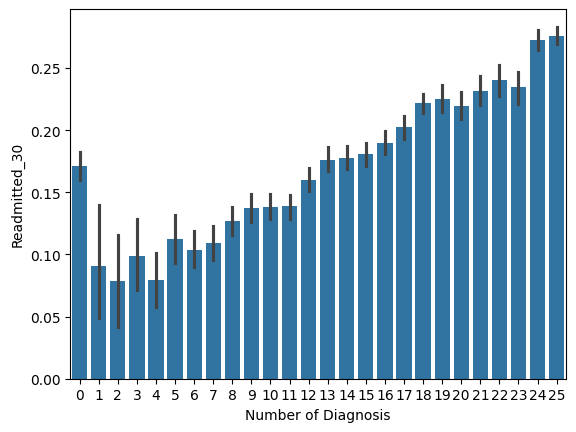

In [ ]:
sns.barplot(data=medical_df, x="Number of Diagnosis", y="Readmitted_30")

<Axes: xlabel='Number of Procedures', ylabel='Readmitted_30'>

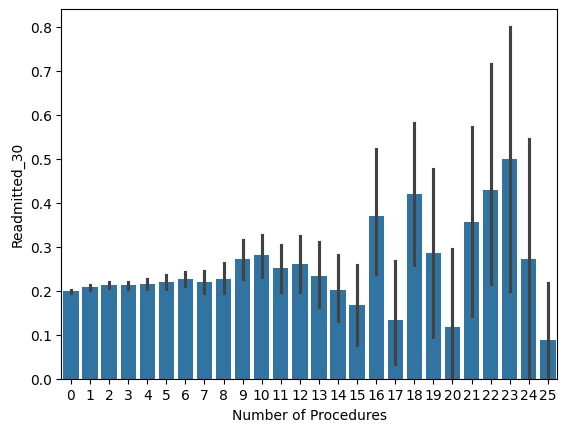

In [ ]:
sns.barplot(data=medical_df, x="Number of Procedures", y="Readmitted_30")

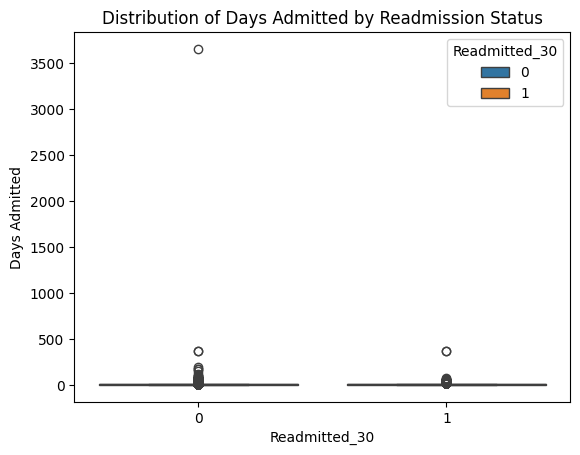

In [ ]:
sns.boxplot(data=medical_df, y="Days Admitted", x="Readmitted_30", hue="Readmitted_30")
plt.title("Distribution of Days Admitted by Readmission Status")
plt.show()

In [ ]:
medical_df["Days Admitted"].unique()

array([   7,    4,    2,    6,    3,   14,    5,    1,   10,   12,   24,
         28,    8,    9,   16,   13,   20,   11,   17,   29,   22,   42,
          0,   19,   15,   18,   26,   25,   23,   31,   21,   36,   32,
         49,   34,   33,   44,   30,   38,   52,   41,   55,   35,   27,
         51,   65,  188,   39,   45,   37,   47,   53,   46,   91,   40,
         48,  168,  368,  367,   43,   50,  121,   54,   72,   62,   69,
         56,   66,   82,   78,   73,   60,   63,   71,   98,   57,  148,
       3655,   61,   99,   75])

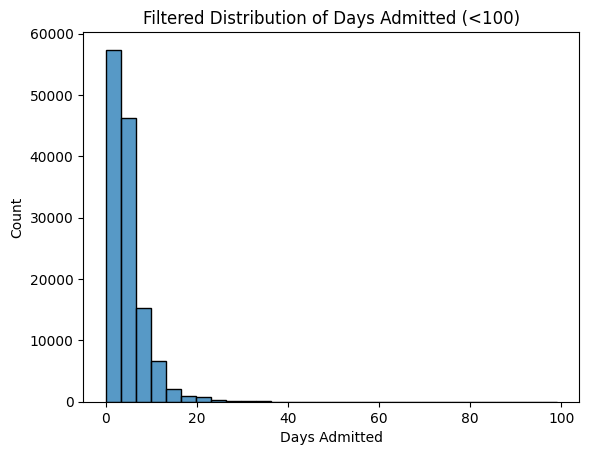

In [ ]:
filtered_df = medical_df[medical_df["Days Admitted"] < 100]

sns.histplot(data=filtered_df, x="Days Admitted", bins=30)
plt.title("Filtered Distribution of Days Admitted (<100)")
plt.xlabel("Days Admitted")
plt.ylabel("Count")
plt.show()

## Model Training

In [ ]:
numeric_df = medical_df.select_dtypes(include='number')

In [ ]:
numeric_df

,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted,Long_Stay,TYPE_ADM_2,TYPE_ADM_3,TYPE_ADM_5,TYPE_ADM_9,SRC_ADMS_2,...,pro_021009W,pro_0F798DZ,pro_02C03ZZ,pro_B4101ZZ,pro_0LS30ZZ,pro_0F9430Z,pro_0HQ0XZZ,pro_0BQS4ZZ,pro_0DBN0ZZ,pro_0JPT0PZ
0,0,25,1,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,15,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,21,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,0,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,0,7,3,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130292,1,24,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130293,0,23,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130294,0,25,3,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = numeric_df.drop("Readmitted_30", axis=1)
Y = numeric_df["Readmitted_30"]

In [ ]:
numeric_df = medical_df.select_dtypes(include='number')

In [ ]:
numeric_df

,Readmitted_30,Number of Diagnosis,Number of Procedures,Days Admitted,Long_Stay,TYPE_ADM_2,TYPE_ADM_3,TYPE_ADM_5,TYPE_ADM_9,SRC_ADMS_2,...,pro_021009W,pro_0F798DZ,pro_02C03ZZ,pro_B4101ZZ,pro_0LS30ZZ,pro_0F9430Z,pro_0HQ0XZZ,pro_0BQS4ZZ,pro_0DBN0ZZ,pro_0JPT0PZ
0,0,25,1,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,15,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,21,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,0,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130291,0,7,3,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130292,1,24,7,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130293,0,23,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130294,0,25,3,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = numeric_df.drop("Readmitted_30", axis=1)
Y = numeric_df["Readmitted_30"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Trying our First Model**

In [ ]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.7930544896392939


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, xgb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7930544896392939
ROC AUC: 0.6293524088514885
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     20759
           1       0.33      0.02      0.03      5301

    accuracy                           0.79     26060
   macro avg       0.57      0.50      0.46     26060
weighted avg       0.70      0.79      0.71     26060



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_features="log2", random_state=42)
rf_clf.fit(X, Y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_features="log2", random_state=42)
rf_clf.fit(X_train, Y_train)

Y_pred2 = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("ROC AUC:", roc_auc_score(Y_test, rf_clf.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred2))

Accuracy: 0.797544128933231
ROC AUC: 0.6388433500622696
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     20759
           1       0.75      0.01      0.01      5301

    accuracy                           0.80     26060
   macro avg       0.77      0.50      0.45     26060
weighted avg       0.79      0.80      0.71     26060



In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

Y_pred3 = lgbm.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("ROC AUC:", roc_auc_score(Y_test, lgbm.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21397, number of negative: 82839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.344479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 104236, number of used features: 450
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205275 -> initscore=-1.353648
[LightGBM] [Info] Start training from score -1.353648
Accuracy: 0.7966999232540292
ROC AUC: 0.6413117021339724
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     20759
           1       0.59      0.00      0.00      5301

    accuracy                           0.80     26060
   macro avg       0.69      0.50      0.45     26060
weighted avg       0.75      0.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
mb = MultinomialNB()
mb.fit(X_train, Y_train)

Y_pred5 = mb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred5))
print("ROC AUC:", roc_auc_score(Y_test, mb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred5))

Accuracy: 0.7522256331542594
ROC AUC: 0.6229444087176503
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     20759
           1       0.33      0.21      0.26      5301

    accuracy                           0.75     26060
   macro avg       0.57      0.55      0.55     26060
weighted avg       0.72      0.75      0.73     26060



In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

Y_pred6 = nb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred6))
print("ROC AUC:", roc_auc_score(Y_test, nb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred6))

Accuracy: 0.38584036838066
ROC AUC: 0.6077593853170319
              precision    recall  f1-score   support

           0       0.87      0.27      0.41     20759
           1       0.23      0.83      0.36      5301

    accuracy                           0.39     26060
   macro avg       0.55      0.55      0.38     26060
weighted avg       0.74      0.39      0.40     26060



In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

Y_pred8 = bnb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred8))
print("ROC AUC:", roc_auc_score(Y_test, bnb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred8))

Accuracy: 0.7194934765924789
ROC AUC: 0.6236061927133716
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     20759
           1       0.31      0.30      0.30      5301

    accuracy                           0.72     26060
   macro avg       0.56      0.56      0.56     26060
weighted avg       0.72      0.72      0.72     26060



In [ ]:
cb = ComplementNB()
cb.fit(X_train, Y_train)

Y_pred7 = cb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred7))
print("ROC AUC:", roc_auc_score(Y_test, cb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred7))

Accuracy: 0.5874520337682272
ROC AUC: 0.6229444087176503
              precision    recall  f1-score   support

           0       0.85      0.59      0.69     20759
           1       0.27      0.60      0.37      5301

    accuracy                           0.59     26060
   macro avg       0.56      0.59      0.53     26060
weighted avg       0.73      0.59      0.63     26060



In [ ]:
cb = ComplementNB(alpha=0.3, class_prior=None, norm=False)
cb.fit(X_train, Y_train)

Y_pred7 = cb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred7))
print("ROC AUC:", roc_auc_score(Y_test, cb.predict_proba(X_test)[:, 1]))
print(classification_report(Y_test, Y_pred7))

Accuracy: 0.5869531849577897
ROC AUC: 0.6227875434195502
              precision    recall  f1-score   support

           0       0.85      0.58      0.69     20759
           1       0.27      0.60      0.37      5301

    accuracy                           0.59     26060
   macro avg       0.56      0.59      0.53     26060
weighted avg       0.73      0.59      0.63     26060



**Loading Test Data**

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_df

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,PRCDRCD21,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd
0,122086,NaN,2019-01-10 00:00:00,2019-01-11 00:00:00,6,1,5,I442,I442,0JH606Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243
1,8063,NaN,2016-02-02 00:00:00,2016-02-05 00:00:00,1,1,1,A419,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872
2,80305,NaN,2018-06-07 00:00:00,2018-06-13 00:00:00,6,1,1,L89219,A419,NaN,...,NaN,Z794,NaN,Z79899,NaN,NaN,NaN,NaN,NaN,871
3,64137,NaN,2016-12-04 00:00:00,2016-12-10 00:00:00,1,1,1,R0602,A419,0W9B3ZZ,...,NaN,Z993,NaN,Z79899,NaN,Z880,NaN,Z98890,NaN,871
4,17937,NaN,2018-05-01 00:00:00,2018-05-10 00:00:00,3,1,2,R509,A419,02HV33Z,...,NaN,I480,NaN,N3091,NaN,E1140,NaN,Z7901,NaN,871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,159146,NaN,2023-08-13 00:00:00,2023-08-16 00:00:00,3,1,5,R0602,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871
32571,21037,NaN,2016-06-05 00:00:00,2016-06-10 00:00:00,3,1,1,-,-,-,...,-,-,-,-,-,-,-,-,-,-
32572,64040,NaN,2016-07-07 00:00:00,2016-07-10 00:00:00,1,1,1,R531,I129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,682
32573,44118,NaN,2016-04-01 00:00:00,2016-04-05 00:00:00,3,1,5,R531,N390,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690


### **Preparing Test Data**

In [ ]:
test_df[dgn_df.columns] = test_df[dgn_df.columns].fillna(0)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32575 entries, 0 to 32574
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            32575 non-null  int64  
 1   STAY_DRG_CD   913 non-null    float64
 2   STAY_FROM_DT  32575 non-null  object 
 3   STAY_THRU_DT  32575 non-null  object 
 4   STUS_CD       32575 non-null  int64  
 5   TYPE_ADM      32575 non-null  int64  
 6   SRC_ADMS      32575 non-null  int64  
 7   AD_DGNS       32575 non-null  object 
 8   DGNSCD01      32575 non-null  object 
 9   PRCDRCD01     15305 non-null  object 
 10  DGNSCD02      32575 non-null  object 
 11  PRCDRCD02     9492 non-null   object 
 12  DGNSCD03      32575 non-null  object 
 13  PRCDRCD03     6431 non-null   object 
 14  DGNSCD04      32575 non-null  object 
 15  PRCDRCD04     4475 non-null   object 
 16  DGNSCD05      32575 non-null  object 
 17  PRCDRCD05     3228 non-null   object 
 18  DGNSCD06      32575 non-nu

In [ ]:
test_df[prc_df.columns] = test_df[prc_df.columns].fillna(0)

In [ ]:
test_df = test_df.replace('-', 0)
test_df = test_df.apply(pd.to_numeric, errors='ignore')

<ipython-input-113-212cd2b9f5f7>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  test_df = test_df.apply(pd.to_numeric, errors='ignore')


In [ ]:
test_df["Number of Diagnosis"] = test_df[dgn_columns].apply(calculate_diagnosis, axis=1)

In [ ]:
test_df["Number of Procedures"] = test_df[prc_columns].apply(calculate_procedures, axis=1)

In [ ]:
test_df["STAY_FROM_DT"] = pd.to_datetime(test_df["STAY_FROM_DT"])

In [ ]:
test_df["STAY_THRU_DT"] = pd.to_datetime(test_df["STAY_THRU_DT"])

In [ ]:
test_df["Days Admitted"] = (test_df["STAY_THRU_DT"] - test_df["STAY_FROM_DT"]).dt.days

In [ ]:
test_df.drop(columns=["STAY_THRU_DT", "STAY_FROM_DT"], inplace=True)

In [ ]:
test_df

,ID,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Number of Diagnosis,Number of Procedures,Days Admitted
0,122086,NaN,6,1,5,I442,I442,0JH606Z,I5032,02HK3JZ,...,0,0,0,0,0,0,243.0,18,4,1
1,8063,NaN,1,1,1,A419,A419,0,K5720,0,...,0,0,0,0,0,0,872.0,8,0,3
2,80305,NaN,6,1,1,L89219,A419,0,L89214,0,...,Z79899,0,0,0,0,0,871.0,23,0,6
3,64137,NaN,1,1,1,R0602,A419,0W9B3ZZ,J189,0,...,Z79899,0,Z880,0,Z98890,0,871.0,25,1,6
4,17937,NaN,3,1,2,R509,A419,02HV33Z,I21A1,B548ZZA,...,N3091,0,E1140,0,Z7901,0,871.0,25,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,159146,NaN,3,1,5,R0602,A419,0,J156,0,...,0,0,0,0,0,0,871.0,15,0,3
32571,21037,NaN,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,5
32572,64040,NaN,1,1,1,R531,I129,0,N170,0,...,0,0,0,0,0,0,682.0,19,0,3
32573,44118,NaN,3,1,5,R531,N390,0,J9811,0,...,0,0,0,0,0,0,690.0,9,0,4


In [ ]:
test_df[(test_df["STAY_DRG_CD"].isnull()) & (test_df["stay_drg_cd"].isnull())]

,ID,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Number of Diagnosis,Number of Procedures,Days Admitted


In [ ]:
test_df[test_df["stay_drg_cd"].isnull()]

,ID,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Number of Diagnosis,Number of Procedures,Days Admitted
5,1010,682.0,3,1,5,E875,N170,0,E43,0,...,0,0,0,0,0,0,NaN,13,0,3
40,2495,682.0,3,1,1,E860,N179,0,G9341,0,...,0,0,0,0,0,0,NaN,13,0,6
66,4445,690.0,1,1,1,R300,N3090,0,E119,0,...,0,0,0,0,0,0,NaN,8,0,2
67,1450,683.0,1,1,1,R531,N179,0,I130,0,...,0,0,0,0,0,0,NaN,18,0,2
113,964,682.0,1,1,2,R109,N179,0,K8590,0,...,0,0,0,0,0,0,NaN,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32365,1871,246.0,1,1,1,R079,I213,027034Z,R570,4A023N7,...,0,0,0,0,0,0,NaN,20,6,4
32401,4050,291.0,62,1,1,R0602,I110,0,J9621,0,...,0,0,0,0,0,0,NaN,13,0,7
32454,645,377.0,1,1,1,R55,K922,5A09357,N170,5A09357,...,Z87891,0,Z90710,0,0,0,NaN,24,4,3
32474,505,683.0,3,1,1,R531,N170,0,N390,0,...,0,0,0,0,0,0,NaN,14,0,3


In [ ]:
test_df[test_df["STAY_DRG_CD"].isnull()]

,ID,STAY_DRG_CD,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Number of Diagnosis,Number of Procedures,Days Admitted
0,122086,NaN,6,1,5,I442,I442,0JH606Z,I5032,02HK3JZ,...,0,0,0,0,0,0,243.0,18,4,1
1,8063,NaN,1,1,1,A419,A419,0,K5720,0,...,0,0,0,0,0,0,872.0,8,0,3
2,80305,NaN,6,1,1,L89219,A419,0,L89214,0,...,Z79899,0,0,0,0,0,871.0,23,0,6
3,64137,NaN,1,1,1,R0602,A419,0W9B3ZZ,J189,0,...,Z79899,0,Z880,0,Z98890,0,871.0,25,1,6
4,17937,NaN,3,1,2,R509,A419,02HV33Z,I21A1,B548ZZA,...,N3091,0,E1140,0,Z7901,0,871.0,25,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,159146,NaN,3,1,5,R0602,A419,0,J156,0,...,0,0,0,0,0,0,871.0,15,0,3
32571,21037,NaN,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,5
32572,64040,NaN,1,1,1,R531,I129,0,N170,0,...,0,0,0,0,0,0,682.0,19,0,3
32573,44118,NaN,3,1,5,R531,N390,0,J9811,0,...,0,0,0,0,0,0,690.0,9,0,4


In [ ]:
def get_stay_drg(row):
    if pd.isnull(row["STAY_DRG_CD"]):
        return row["stay_drg_cd"]
    return row["STAY_DRG_CD"]
test_df["STAY_DRG"] = test_df[["STAY_DRG_CD", "stay_drg_cd"]].apply(get_stay_drg, axis=1)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32575 entries, 0 to 32574
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    32575 non-null  int64  
 1   STAY_DRG_CD           913 non-null    float64
 2   STUS_CD               32575 non-null  int64  
 3   TYPE_ADM              32575 non-null  int64  
 4   SRC_ADMS              32575 non-null  int64  
 5   AD_DGNS               32575 non-null  object 
 6   DGNSCD01              32575 non-null  object 
 7   PRCDRCD01             32575 non-null  object 
 8   DGNSCD02              32575 non-null  object 
 9   PRCDRCD02             32575 non-null  object 
 10  DGNSCD03              32575 non-null  object 
 11  PRCDRCD03             32575 non-null  object 
 12  DGNSCD04              32575 non-null  object 
 13  PRCDRCD04             32575 non-null  object 
 14  DGNSCD05              32575 non-null  object 
 15  PRCDRCD05          

In [ ]:
test_df.drop(columns=["STAY_DRG_CD", "stay_drg_cd"], inplace=True)

In [ ]:
test_df.isnull().sum()

,0
ID,0
STUS_CD,0
TYPE_ADM,0
SRC_ADMS,0
AD_DGNS,0
DGNSCD01,0
PRCDRCD01,0
DGNSCD02,0
PRCDRCD02,0
DGNSCD03,0


In [ ]:
test_df[test_df.eq("-").any(axis=1)]

,ID,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,DGNSCD02,PRCDRCD02,DGNSCD03,...,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,Number of Diagnosis,Number of Procedures,Days Admitted,STAY_DRG


In [ ]:
test_df = test_df[~test_df.eq("-").any(axis=1)]

In [ ]:
test_df["STAY_DRG"] = test_df["STAY_DRG"].astype(int)

In [ ]:
test_df['Long_Stay'] = (test_df['Days Admitted'] > 7).astype(int)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['TYPE_ADM', 'SRC_ADMS', 'STUS_CD'], drop_first=True)

In [ ]:
test_df.shape

(32575, 67)

In [ ]:
test_df["STAY_DRG"].unique()

array([243, 872, 871, 682, 291, 534, 313, 206, 202, 309, 683, 392, 190,
       470, 251, 377,  65, 637, 193, 177, 472, 189, 564,   0, 885, 622,
       380, 303, 854, 690, 689, 947, 603,  57, 698, 292, 178, 100, 101,
       853, 149,  56, 252, 175, 310,  38, 281, 870, 394,  74, 194,  64,
       393, 602,  25,  70, 280, 812, 166, 884, 372, 192, 378, 684, 300,
       640, 312, 520, 483, 498, 371, 330, 235, 391, 246,  92, 247, 356,
       308, 234, 236, 460, 481,  69, 157, 191, 469, 388, 266, 305, 293,
       918, 195, 553, 638, 199, 917, 811, 948, 480, 299, 454, 249, 196,
       441, 593, 563, 558, 432,  73, 596, 248, 389, 229,  66, 494, 560,
       282, 417, 314, 987, 580, 311, 864, 244, 713, 674, 168, 554, 302,
       552, 242, 267, 315, 482, 228, 219, 233, 641, 809, 493, 265, 442,
       301, 536, 208, 515, 439, 327, 473,  91, 981, 186, 203, 326, 699,
       304, 621, 467, 856, 179, 390, 231, 535, 539, 492, 329,  72, 207,
       644, 570,  61, 264, 379, 571, 445, 254, 287, 226, 331, 45

In [ ]:
def create_drg_category_mapping():
    drg_map = {
        'PRE': (1, 19),
        'NERVOUS': (20, 103),
        'EYE': (113, 125),
        'ENT': (135, 159),
        'RESPIRATORY': (163, 208),
        'CIRCULATORY': (212, 320),
        'DIGESTIVE': (321, 399),
        'HEPATOBILIARY': (402, 446),
        'MUSCULOSKELETAL': (447, 566),
        'SKIN': (570, 607),
        'ENDOCRINE': (614, 645),
        'RENAL': (650, 700),
        'MALE_REPRO': (707, 730),
        'FEMALE_REPRO': (734, 761),
        'PREGNANCY': (768, 833),
        'NEWBORN': (789, 798),
        'HEMATOLOGIC': (799, 816),
        'MYELOPROLIFERATIVE': (820, 850),
        'INFECTIOUS': (853, 872),
        'MENTAL_HEALTH': (876, 887),
        'SUBSTANCE_ABUSE': (894, 897),
        'INJURY': (901, 923),
        'BURNS': (927, 935),
        'HEALTH_STATUS': (939, 951),
        'TRAUMA': (955, 965),
        'HIV': (969, 977),
        'OR_UNRELATED': (981, 989),
        'INVALID_DIAGNOSIS': (998, 998),
        'UNGROUPABLE': (999, 999)
    }
    return drg_map

In [ ]:
def get_all_drg_categories():
    drg_map = create_drg_category_mapping()
    return list(drg_map.keys()) + ['UNKNOWN']

In [ ]:
def map_drg_with_all_categories(drg_code):
    try:
        drg_num = int(drg_code)
    except (ValueError, TypeError):
        return 'UNKNOWN'

    drg_map = create_drg_category_mapping()

    for category, (low, high) in drg_map.items():
        if low <= drg_num <= high:
            return category

    return 'UNKNOWN'

test_df['DRG_CATEGORY'] = test_df['STAY_DRG'].apply(map_drg_with_all_categories)

In [ ]:
test_df = test_df.reset_index(drop=True)

all_drg_categories = get_all_drg_categories()

test_encoded = encoder.transform(test_df[['DRG_CATEGORY']])

test_encoded_df = pd.DataFrame(
    test_encoded,
    columns=encoder.get_feature_names_out(['DRG_CATEGORY'])
)

test_df = pd.concat([test_df.drop(['STAY_DRG', 'DRG_CATEGORY'], axis=1), test_encoded_df], axis=1)

In [ ]:
test_df.shape

(32575, 96)

In [ ]:
test_df_copy = test_df.copy()

In [ ]:
len(test_df["AD_DGNS"].unique())

1203

In [ ]:
def map_icd10_to_category(icd_code):
    """Map ICD-10 code to clinical category based on the first character"""
    if pd.isna(icd_code) or not isinstance(icd_code, str):
        return 'UNKNOWN'

    # Extract first character (letter) and first two digits
    first_char = icd_code[0].upper() if len(icd_code) > 0 else ''
    first_two = icd_code[1:3] if len(icd_code) > 2 else ''

    try:
        numeric_part = int(first_two)
    except ValueError:
        numeric_part = 0

    # ICD-10 category mapping
    if first_char == 'A' or first_char == 'B':
        if numeric_part <= 99:
            return 'INFECTIOUS_PARASITIC'
    elif first_char == 'C' or (first_char == 'D' and numeric_part <= 49):
        return 'NEOPLASMS'
    elif first_char == 'D' and numeric_part >= 50:
        return 'BLOOD_DISEASES'
    elif first_char == 'E':
        return 'ENDOCRINE_METABOLIC'
    elif first_char == 'F':
        return 'MENTAL_BEHAVIORAL'
    elif first_char == 'G':
        return 'NERVOUS_SYSTEM'
    elif first_char == 'H':
        if numeric_part <= 59:
            return 'EYE_DISEASES'
        else:
            return 'EAR_DISEASES'
    elif first_char == 'I':
        return 'CIRCULATORY'
    elif first_char == 'J':
        return 'RESPIRATORY'
    elif first_char == 'K':
        return 'DIGESTIVE'
    elif first_char == 'L':
        return 'SKIN_DISEASES'
    elif first_char == 'M':
        return 'MUSCULOSKELETAL'
    elif first_char == 'N':
        return 'GENITOURINARY'
    elif first_char == 'O':
        return 'PREGNANCY_CHILDBIRTH'
    elif first_char == 'P':
        return 'PERINATAL_CONDITIONS'
    elif first_char == 'Q':
        return 'CONGENITAL_ANOMALIES'
    elif first_char == 'R':
        return 'SYMPTOMS_SIGNS'
    elif first_char == 'S' or first_char == 'T':
        return 'INJURY_POISONING'
    elif first_char == 'U':
        return 'SPECIAL_PURPOSES'
    elif first_char == 'V' or first_char == 'W' or first_char == 'X' or first_char == 'Y':
        return 'EXTERNAL_CAUSES'
    elif first_char == 'Z':
        return 'HEALTH_STATUS_FACTORS'

    return 'UNKNOWN'

In [ ]:
all_icd_categories = [
    'INFECTIOUS_PARASITIC', 'NEOPLASMS', 'BLOOD_DISEASES', 'ENDOCRINE_METABOLIC',
    'MENTAL_BEHAVIORAL', 'NERVOUS_SYSTEM', 'EYE_DISEASES', 'EAR_DISEASES',
    'CIRCULATORY', 'RESPIRATORY', 'DIGESTIVE', 'SKIN_DISEASES', 'MUSCULOSKELETAL',
    'GENITOURINARY', 'PREGNANCY_CHILDBIRTH', 'PERINATAL_CONDITIONS',
    'CONGENITAL_ANOMALIES', 'SYMPTOMS_SIGNS', 'INJURY_POISONING', 'SPECIAL_PURPOSES',
    'EXTERNAL_CAUSES', 'HEALTH_STATUS_FACTORS', 'UNKNOWN'
]

test_df['ICD_CATEGORY'] = test_df['AD_DGNS'].apply(map_icd10_to_category)
test_df['ICD_CATEGORY'] = pd.Categorical(
    test_df['ICD_CATEGORY'],
    categories=all_icd_categories
)

test_icd_encoded = icd_encoder.transform(test_df[['ICD_CATEGORY']])

test_icd_encoded_df = pd.DataFrame(
    test_icd_encoded,
    columns=icd_encoder.get_feature_names_out(['ICD_CATEGORY'])
)

test_df = pd.concat([test_df.drop(['AD_DGNS', 'ICD_CATEGORY'], axis=1), test_icd_encoded_df], axis=1)

In [ ]:
test_df.shape

(32575, 118)

In [ ]:
test_df_copy = medical_df.copy()

In [ ]:
diagnosis_cols = [f'DGNSCD{i:02d}' for i in range(1, 26)]

In [ ]:
for code in most_common_diagnoses:
    test_df[f'diag_{code}'] = test_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)

<ipython-input-147-5c0791fd0fdf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'diag_{code}'] = test_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-147-5c0791fd0fdf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'diag_{code}'] = test_df[diagnosis_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-147-5c0791fd0fdf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [ ]:
for code in most_common_procedures:
    test_df[f'pro_{code}'] = test_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)

<ipython-input-148-9817860d9ac5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'pro_{code}'] = test_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-148-9817860d9ac5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'pro_{code}'] = test_df[procedure_cols].apply(lambda x: code in x.values, axis=1).astype(int)
<ipython-input-148-9817860d9ac5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [ ]:
bool_cols = [
    "TYPE_ADM_2", "TYPE_ADM_3", "TYPE_ADM_5", "TYPE_ADM_9",
    "SRC_ADMS_2", "SRC_ADMS_5",
    "STUS_CD_3", "STUS_CD_6", "STUS_CD_62", "STUS_CD_63"
]

test_df[bool_cols] = test_df[bool_cols].astype(int)

In [ ]:
test_df.shape

(32575, 518)

In [ ]:
medical_df.shape

(130296, 518)

In [ ]:
numeric_df = test_df.select_dtypes(include='number')

In [ ]:
numeric_df

,ID,Number of Diagnosis,Number of Procedures,Days Admitted,Long_Stay,TYPE_ADM_2,TYPE_ADM_3,TYPE_ADM_5,TYPE_ADM_9,SRC_ADMS_2,...,pro_021009W,pro_0F798DZ,pro_02C03ZZ,pro_B4101ZZ,pro_0LS30ZZ,pro_0F9430Z,pro_0HQ0XZZ,pro_0BQS4ZZ,pro_0DBN0ZZ,pro_0JPT0PZ
0,122086,18,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8063,8,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80305,23,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64137,25,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17937,25,2,9,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,159146,15,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32571,21037,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32572,64040,19,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32573,44118,9,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = numeric_df.drop("ID", axis=1)

In [ ]:
X

,Number of Diagnosis,Number of Procedures,Days Admitted,Long_Stay,TYPE_ADM_2,TYPE_ADM_3,TYPE_ADM_5,TYPE_ADM_9,SRC_ADMS_2,SRC_ADMS_5,...,pro_021009W,pro_0F798DZ,pro_02C03ZZ,pro_B4101ZZ,pro_0LS30ZZ,pro_0F9430Z,pro_0HQ0XZZ,pro_0BQS4ZZ,pro_0DBN0ZZ,pro_0JPT0PZ
0,18,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25,2,9,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,15,0,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32571,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32572,19,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32573,9,0,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_pred = rf_clf.predict(X)

In [ ]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Readmitted_30': test_pred
})

In [ ]:
submission_df

,ID,Readmitted_30
0,122086,0
1,8063,0
2,80305,0
3,64137,0
4,17937,0
...,...,...
32570,159146,0
32571,21037,0
32572,64040,0
32573,44118,0


In [ ]:
submission_df["Readmitted_30"].value_counts()

,count
Readmitted_30,
0,32503
1,72


In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
test_pred_2 = lgbm.predict(X)

In [ ]:
submission_df2 = pd.DataFrame({
    'ID': test_df['ID'],
    'Readmitted_30': test_pred_2
})

In [ ]:
comparison_df = submission_df.merge(submission_df2, on='ID', suffixes=('_1', '_2'))

In [ ]:
comparison_df

,ID,Readmitted_30_1,Readmitted_30_2
0,122086,0,0
1,8063,0,0
2,80305,0,0
3,64137,1,0
4,17937,1,0
...,...,...,...
32570,159146,1,0
32571,21037,1,0
32572,64040,0,0
32573,44118,0,0


In [ ]:
diffs = comparison_df[comparison_df['Readmitted_30_1'] != comparison_df['Readmitted_30_2']]

In [ ]:
diffs

,ID,Readmitted_30_1,Readmitted_30_2
3,64137,1,0
4,17937,1,0
5,1010,1,0
6,64639,1,0
7,104159,1,0
...,...,...,...
32557,61132,1,0
32561,15975,1,0
32563,100624,1,0
32570,159146,1,0


In [ ]:
diffs = comparison_df[(comparison_df['Readmitted_30_1'] == 0) & (comparison_df['Readmitted_30_2'] == 1)]

In [ ]:
diffs

,ID,Readmitted_30_1,Readmitted_30_2
